In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
df = pd.read_csv("D:\Eduson_data\ds_salaries.csv", index_col=0)
# print(df.head())

 1. Обход по группам

In [ ]:
for name, group in df.groupby(['experience_level', 'company_size']):
    print(name)        # имя группы (tuple)
    # print(group.head())  # содержимое подтаблицы


2. Фильтрация групп: .filter()
* x.salary_in_usd > 400000 → булев массив (например, [False, False, True, False])

* .any() → True, если хотя бы одно значение True

In [ ]:
df.groupby('experience_level').filter(lambda x:  (x.salary_in_usd > 500000).any())

Оставить группы, где все зарплаты не больше 400k:
* 

In [ ]:
df.groupby('experience_level').filter(lambda x:  (x.salary_in_usd != 400000).all())

Оставить группы, где средняя зарплата > 400k:

In [ ]:
df.groupby('experience_level').filter(lambda x: x.salary_in_usd.mean() > 100000)

3. Трансформация: .transform()

transform - применяет функцию к каждому элементу DataFrame или Series, возвращая результат с той же формой, что и исходные данные.
* Синтаксис: DataFrame.transform(func, axis=0, *args, **kwargs)
* Группировка зарплат по сегментам experience_level и вычисление отклонения от среднего
* .transform(lambda x: x - x.mean())→ к каждой группе применяется функция:

* x — это Series зарплат внутри одного грейда,

* x.mean() — средняя зарплата в этом грейде,

* x - x.mean() — отклонение каждой зарплаты от среднего.

In [ ]:
# Центрировать зарплату внутри каждого грейда
df['salary_centered'] = df.groupby('experience_level')['salary_in_usd'].transform(lambda x: x - x.mean())
df['salary_centered']

5. Полная статистика по каждой группе

In [ ]:
df.groupby('experience_level')['salary_in_usd'].describe()


6. Получить список групп: .groups
* Словарь -> { имя группы : [индексы]}

In [ ]:
df.groupby('experience_level').groups


7. Сохранить результат: .get_group()
* Получить конкретную подгруппу

In [ ]:
df.groupby('experience_level').get_group('SE')


8. merge - слияние нового столбца(результат группировки) и исходного df 
* merge() -- это как в SQL -> JOIN
спользуется, когда нужно объединить два DataFrame по общему признаку (ключу / колонке).
* concat() -- это как склеивание
Используется, когда нужно соединить DataFrames по строкам (axis=0) или по колонкам (axis=1), без ключей.

In [ ]:
grp = df.groupby(['experience_level'])['company_size'].sum().rename('sum_grp').reset_index()

df_1 = df.merge(grp)

df_1

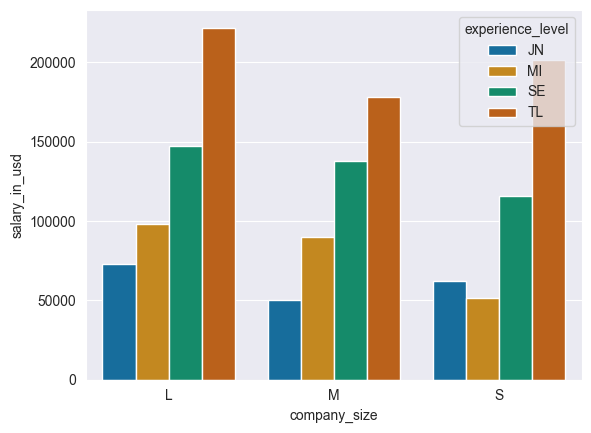

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt
grp = df.groupby(['company_size', 'experience_level'])[['salary_in_usd']].mean().reset_index()
# print(grp)

sns.barplot(data=grp, x=grp.company_size, y=grp.salary_in_usd, hue=grp.experience_level, palette='colorblind')
plt.show()

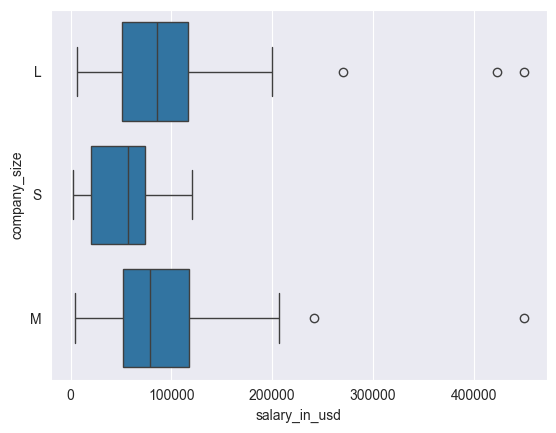

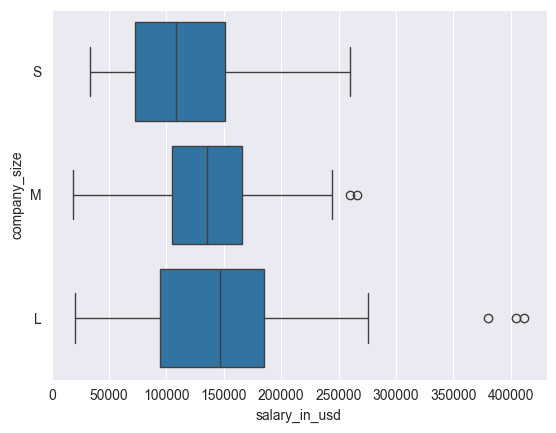

In [208]:
df_mi = df[df.experience_level == 'MI']
df_se = df[df.experience_level == 'SE']

sns.boxplot(data=df_mi, x=df_mi.salary_in_usd, y=df_mi.company_size)
plt.show()

sns.boxplot(data=df_se, x=df_se.salary_in_usd, y=df_se.company_size)
plt.show()
